# 날씨에 따른 버스 승강장 이용량 수 예측 모델(Linear Regression)

## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
bus_df = pd.read_csv(r'빅데이터 자료\bus.csv', encoding = "euc-kr")
print(bus_df.shape)
bus_df

(959, 15)


,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,어린이승차인원,어린이하차인원,어린이환승인원,미분류승차인원,미분류하차인원,미분류환승인원
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,101352,87904,21496,100732,87357,21418
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,128399,111759,30057,127352,110845,29925
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,75682,68218,14331,74844,67497,14250
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,41254,36899,7469,40955,36676,7453
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,80264,73987,15906,79491,73248,15782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,954,2023년 09월 07일,유성구,152698,138565,32942,160752,144967,34214,153366,139164,32989,152698,138565,32942
955,955,2023년 09월 08일,동구,172094,152675,42344,181052,159272,43949,172772,153266,42402,172131,152743,42344
956,956,2023년 09월 08일,서구,250800,219457,61291,262961,228697,63201,251849,220306,61394,250800,219457,61291
957,957,2023년 09월 08일,중구,133494,123216,29042,142774,129320,30328,134243,123795,29104,133494,123216,29042


In [2]:
wether = pd.read_csv(r'빅데이터 자료\대전날씨2월9월.csv',encoding="euc-kr")
print(wether.shape)

wether_ch = pd.DataFrame(wether)

wether_ch['일시'] = pd.to_datetime(wether_ch['일시']).dt.strftime('%Y년 %m월 %d일')

wether_ch

(191, 12)


,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),강수 계속시간(hr),일강수량(mm),최소 상대습도(%),평균 상대습도(%),가조시간(hr),평균 지면온도(°C),기사
0,대전,2023년 03월 01일,6.6,2.1,11.6,NaN,NaN,28,52.5,11.4,6.6,{연무}1415-{연무}{강도0}1500-1540.
1,대전,2023년 03월 02일,2.3,-1.6,7.7,NaN,NaN,13,25.9,11.4,4.8,NaN
2,대전,2023년 03월 03일,4.2,-4.1,13.3,NaN,NaN,20,45.9,11.5,5.8,NaN
3,대전,2023년 03월 04일,6.4,-0.5,14.2,NaN,NaN,24,53.3,11.5,7.2,{햇무리}1345-1430.
4,대전,2023년 03월 05일,7.9,-0.6,17.2,NaN,NaN,17,41.0,11.5,8.4,{연무}0840-{연무}{강도0}0900-1015. {연무}1205-1425.
...,...,...,...,...,...,...,...,...,...,...,...,...
186,대전,2023년 09월 03일,27.0,22.3,32.5,NaN,NaN,52,74.5,12.9,30.7,{달코로나}2205-2320.
187,대전,2023년 09월 04일,27.4,24.0,31.5,NaN,NaN,57,75.3,12.9,29.8,{달코로나}0245-0340. {달코로나}0440-0530. {해코로나}0650-0...
188,대전,2023년 09월 05일,26.9,23.8,31.2,NaN,NaN,48,66.8,12.8,30.7,{달코로나}0255-0330.
189,대전,2023년 09월 06일,26.0,21.0,31.3,NaN,NaN,48,67.6,12.8,29.2,NaN


## 데이터 전처리

In [3]:
bus_df.isnull().sum()

Unnamed: 0    0
일자            0
구             0
일반승차인원        0
일반하차인원        0
일반환승인원        0
청소년승차인원       0
청소년하차인원       0
청소년환승인원       0
어린이승차인원       0
어린이하차인원       0
어린이환승인원       0
미분류승차인원       0
미분류하차인원       0
미분류환승인원       0
dtype: int64

In [4]:
bus_df1 = bus_df.drop("어린이승차인원", axis = 1)
bus_df1.head()

,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,어린이하차인원,어린이환승인원,미분류승차인원,미분류하차인원,미분류환승인원
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,87904,21496,100732,87357,21418
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,111759,30057,127352,110845,29925
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,68218,14331,74844,67497,14250
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,36899,7469,40955,36676,7453
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,73987,15906,79491,73248,15782


In [5]:
bus_df2 = bus_df1.drop("어린이하차인원", axis = 1)
bus_df2.head()

,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,어린이환승인원,미분류승차인원,미분류하차인원,미분류환승인원
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,21496,100732,87357,21418
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,30057,127352,110845,29925
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,14331,74844,67497,14250
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,7469,40955,36676,7453
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,15906,79491,73248,15782


In [6]:
bus_df3 = bus_df2.drop("어린이환승인원", axis = 1)
bus_df3.head()

,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,미분류승차인원,미분류하차인원,미분류환승인원
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,100732,87357,21418
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,127352,110845,29925
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,74844,67497,14250
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,40955,36676,7453
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,79491,73248,15782


In [7]:
bus_df4 = bus_df3.drop("미분류승차인원", axis = 1)
bus_df4.head()

,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,미분류하차인원,미분류환승인원
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,87357,21418
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,110845,29925
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,67497,14250
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,36676,7453
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,73248,15782


In [8]:
bus_df5 = bus_df4.drop("미분류하차인원", axis = 1)
bus_df5.head()

,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,미분류환승인원
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,21418
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,29925
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,14250
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,7453
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,15782


In [9]:
bus_df6 = bus_df5.drop("미분류환승인원", axis = 1)
bus_df6.head()

,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600


In [10]:
bus_df6

,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600
...,...,...,...,...,...,...,...,...,...
954,954,2023년 09월 07일,유성구,152698,138565,32942,160752,144967,34214
955,955,2023년 09월 08일,동구,172094,152675,42344,181052,159272,43949
956,956,2023년 09월 08일,서구,250800,219457,61291,262961,228697,63201
957,957,2023년 09월 08일,중구,133494,123216,29042,142774,129320,30328


In [11]:
wether_df = wether_ch.drop("최저기온(°C)",axis=1)
wether_df = wether_df.drop("강수 계속시간(hr)",axis=1)
wether_df = wether_df.drop("기사",axis=1)
wether_df = wether_df.drop("지점명",axis=1)
wether_df = wether_df.drop("최소 상대습도(%)",axis=1)
wether_df = wether_df.drop("평균 상대습도(%)",axis=1)
wether_df

,일시,평균기온(°C),최고기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
0,2023년 03월 01일,6.6,11.6,NaN,11.4,6.6
1,2023년 03월 02일,2.3,7.7,NaN,11.4,4.8
2,2023년 03월 03일,4.2,13.3,NaN,11.5,5.8
3,2023년 03월 04일,6.4,14.2,NaN,11.5,7.2
4,2023년 03월 05일,7.9,17.2,NaN,11.5,8.4
...,...,...,...,...,...,...
186,2023년 09월 03일,27.0,32.5,NaN,12.9,30.7
187,2023년 09월 04일,27.4,31.5,NaN,12.9,29.8
188,2023년 09월 05일,26.9,31.2,NaN,12.8,30.7
189,2023년 09월 06일,26.0,31.3,NaN,12.8,29.2


In [12]:
mergebus_df = bus_df6.merge(wether_df, left_on=['일자'], right_on=['일시'], how='left')
mergebus_df = mergebus_df.drop("일시",axis=1)
mergebus_df = mergebus_df.drop("Unnamed: 0",axis=1)

mergebus_df = mergebus_df[mergebus_df['일자'] != "2023년 09월 08일"]

mergebus_df['일강수량(mm)'].fillna(0.0, inplace=True)

mergebus_df

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),최고기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,6.6,11.6,0.0,11.4,6.6
1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,6.6,11.6,0.0,11.4,6.6
2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,6.6,11.6,0.0,11.4,6.6
3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,6.6,11.6,0.0,11.4,6.6
4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,6.6,11.6,0.0,11.4,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,2023년 09월 07일,동구,164744,146653,43207,173407,153069,44823,25.0,30.1,0.0,12.8,30.5
951,2023년 09월 07일,서구,243319,212731,59791,254763,221277,61578,25.0,30.1,0.0,12.8,30.5
952,2023년 09월 07일,중구,130540,118669,29524,139576,124670,30853,25.0,30.1,0.0,12.8,30.5
953,2023년 09월 07일,대덕구,83243,74603,17208,88149,77898,17796,25.0,30.1,0.0,12.8,30.5


In [78]:
mergebus_df[(mergebus_df['일반승차인원']==0) & (mergebus_df['일반하차인원']==0) & (mergebus_df['청소년승차인원']==0)]

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),최고기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
30,2023년 03월 07일,동구,0,0,0,0,0,0,11.9,21.1,0.0,11.6,10.8
31,2023년 03월 07일,서구,0,0,0,0,0,0,11.9,21.1,0.0,11.6,10.8
32,2023년 03월 07일,중구,0,0,0,0,0,0,11.9,21.1,0.0,11.6,10.8
33,2023년 03월 07일,대덕구,0,0,0,0,0,0,11.9,21.1,0.0,11.6,10.8
34,2023년 03월 07일,유성구,0,0,0,0,0,0,11.9,21.1,0.0,11.6,10.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,2023년 05월 31일,대덕구,0,0,0,0,0,0,22.3,28.3,0.0,14.5,25.2
459,2023년 05월 31일,유성구,0,0,0,0,0,0,22.3,28.3,0.0,14.5,25.2
551,2023년 06월 19일,서구,0,0,0,0,0,0,27.0,33.5,0.0,14.6,36.6
552,2023년 06월 19일,중구,0,0,0,0,0,0,27.0,33.5,0.0,14.6,36.6


In [98]:
mergebus_df = mergebus_df.drop(mergebus_df[(mergebus_df['일반승차인원']==0) & (mergebus_df['일반하차인원']==0) & (mergebus_df['청소년승차인원']==0)].index)

In [104]:
mergebus_df = mergebus_df.reset_index()
mergebus_df = mergebus_df.drop("index",axis=1)
mergebus_df

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),최고기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,6.6,11.6,0.0,11.4,6.6
1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,6.6,11.6,0.0,11.4,6.6
2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,6.6,11.6,0.0,11.4,6.6
3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,6.6,11.6,0.0,11.4,6.6
4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,6.6,11.6,0.0,11.4,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,2023년 09월 07일,동구,164744,146653,43207,173407,153069,44823,25.0,30.1,0.0,12.8,30.5
890,2023년 09월 07일,서구,243319,212731,59791,254763,221277,61578,25.0,30.1,0.0,12.8,30.5
891,2023년 09월 07일,중구,130540,118669,29524,139576,124670,30853,25.0,30.1,0.0,12.8,30.5
892,2023년 09월 07일,대덕구,83243,74603,17208,88149,77898,17796,25.0,30.1,0.0,12.8,30.5


In [105]:
mergebus_df.to_csv(r'빅데이터 자료\최종데이터.csv')

In [138]:
sum_person = []
mean_person = []
mean_temp = []
mean_high_temp = []
mean_pds = []

for i in month_list:
    month_df = mergebus_df[mergebus_df['일자'].str.contains(i)]
    sum_person.append(month_df['일반승차인원'].sum() + month_df['청소년승차인원'].sum())
    mean_person.append(int((month_df['일반승차인원'].mean() + month_df['청소년승차인원'].mean())/2))
    mean_temp.append(round(month_df['평균기온(°C)'].mean(),1))
    mean_high_temp.append(round(month_df['최고기온(°C)'].mean(), 1))
    mean_pds.append(round(month_df['가조시간(hr)'].mean(),1))
    
    
print('전체 탑승인원 :', sum_person)
print('평균 탑승인원 :', mean_person)
print('평균 최고 기온: ', mean_high_temp)
print('평균 온도 : ',mean_temp)
print('가조시간: ',mean_pds)

전체 탑승인원 : [36774723, 39424336, 29192778, 38074084, 38681386, 38922729]
평균 탑승인원 : [131338, 131414, 130324, 129503, 124778, 125557]
평균 최고 기온:  [17.5, 19.9, 24.9, 29.1, 30.2, 31.7]
평균 온도 :  [9.8, 13.7, 18.3, 23.6, 25.8, 27.0]
가조시간:  [12.0, 13.1, 14.0, 14.6, 14.4, 13.5]


In [139]:
data = {'월': month_list, '전체 탑승인원': sum_person, '평균 탑승인원': mean_person,'평균 온도' : mean_temp, '평균최고온도': mean_high_temp,'가조시간' : mean_pds}
df = pd.DataFrame(data)

df = df.set_index('월')
df

,전체 탑승인원,평균 탑승인원,평균 온도,평균최고온도,가조시간
월,,,,,
03월,36774723,131338,9.8,17.5,12.0
04월,39424336,131414,13.7,19.9,13.1
05월,29192778,130324,18.3,24.9,14.0
06월,38074084,129503,23.6,29.1,14.6
07월,38681386,124778,25.8,30.2,14.4
08월,38922729,125557,27.0,31.7,13.5


In [17]:
import matplotlib.pyplot as plt

In [18]:
plt.rcParams['font.family'] = 'Gulim'  

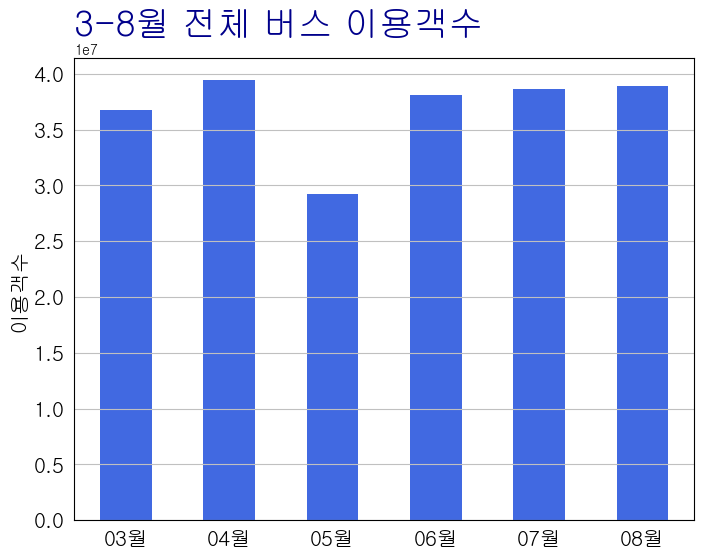

In [109]:
ax = df['전체 탑승인원'].plot.bar(rot=0,                     # Rotation for ticks
                      color="royalblue",         # The color for each of the DataFrame’s columns.
                      figsize=(8, 6),            # Size of a figure object. (a tuple (width, height) in inches)
                      fontsize=15)  # 색상
ax.set_title("3-8월 전체 버스 이용객수", loc="left",                         # Which title to set.
             color="darkblue",                   # color
             fontsize=25)               # 제목
ax.set_xlabel("")                                # x축 이름
ax.set_ylabel("이용객수", fontsize=15)                     # y축 이름
ax.set_facecolor('white')                        # 배경색
ax.grid(True, axis='y', color="silver")         # 눈금선(y축)
ax.tick_params(left = False, bottom = False)   # 눈금 제거
ax.spines['bottom'].set_color('black')           # x축 표시
ax.legend().remove()  
plt.savefig('3-8월버스이용객그래프.png')     

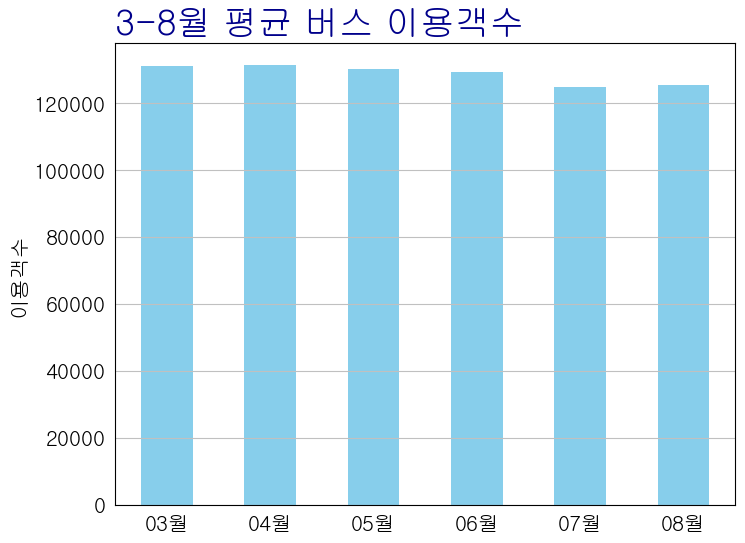

In [140]:
ax = df['평균 탑승인원'].plot.bar(rot=0,                     # Rotation for ticks
                      color="skyblue",         # The color for each of the DataFrame’s columns.
                      figsize=(8, 6),            # Size of a figure object. (a tuple (width, height) in inches)
                      fontsize=15)  # 색상
ax.set_title("3-8월 평균 버스 이용객수", loc="left",                         # Which title to set.
             color="darkblue",                   # color
             fontsize=25)               # 제목
ax.set_xlabel("")                                # x축 이름
ax.set_ylabel("이용객수", fontsize=15)                     # y축 이름
ax.set_facecolor('white')                        # 배경색
ax.grid(True, axis='y', color="silver")         # 눈금선(y축)
ax.tick_params(left = False, bottom = False)   # 눈금 제거
ax.spines['bottom'].set_color('black')           # x축 표시
ax.legend().remove()  
plt.savefig('3-8월평균버스이용객그래프.png')    

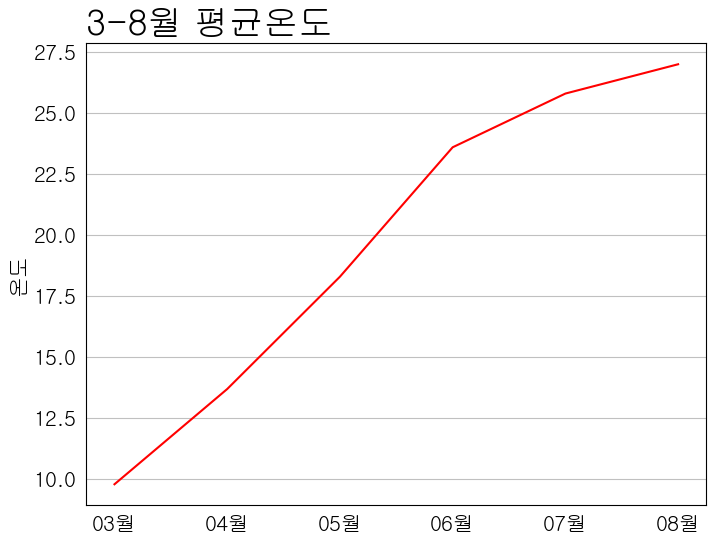

In [111]:
ax_temp = df['평균 온도'].plot.line(rot=0,                     # Rotation for ticks
                      color="red",         # The color for each of the DataFrame’s columns.
                      figsize=(8, 6),            # Size of a figure object. (a tuple (width, height) in inches)
                      fontsize=15)  # 색상
ax_temp.set_title("3-8월 평균온도", loc="left",                         # Which title to set.
             color="black",                   # color
             fontsize=25)               # 제목
ax_temp.set_xlabel("")                                # x축 이름
ax_temp.set_ylabel("온도", fontsize=15)                     # y축 이름
ax_temp.set_facecolor('white')                        # 배경색
ax_temp.grid(True, axis='y', color="silver")         # 눈금선(y축)
ax_temp.tick_params(left = False, bottom = False)   # 눈금 제거
ax_temp.spines['bottom'].set_color('black')           # x축 표시
ax_temp.legend().remove()  
plt.savefig('3-8월평균온도그래프.png')   

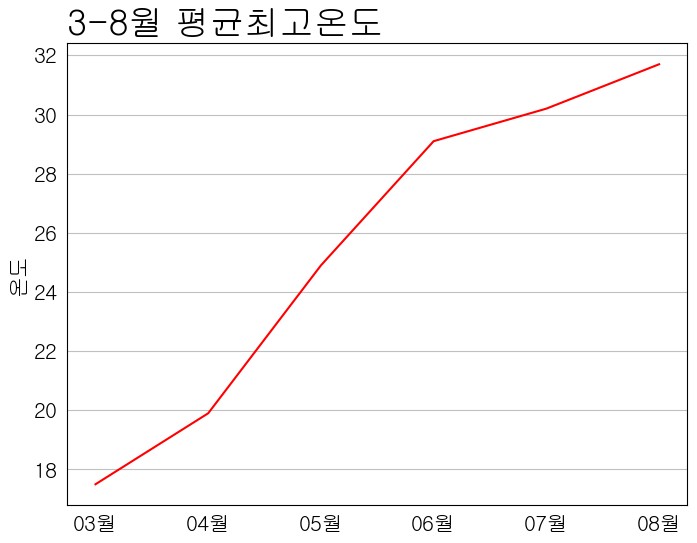

In [112]:
ax_temp = df['평균최고온도'].plot.line(rot=0,                     # Rotation for ticks
                      color="red",         # The color for each of the DataFrame’s columns.
                      figsize=(8, 6),            # Size of a figure object. (a tuple (width, height) in inches)
                      fontsize=15)  # 색상
ax_temp.set_title("3-8월 평균최고온도", loc="left",                         # Which title to set.
             color="black",                   # color
             fontsize=25)               # 제목
ax_temp.set_xlabel("")                                # x축 이름
ax_temp.set_ylabel("온도", fontsize=15)                     # y축 이름
ax_temp.set_facecolor('white')                        # 배경색
ax_temp.grid(True, axis='y', color="silver")         # 눈금선(y축)
ax_temp.tick_params(left = False, bottom = False)   # 눈금 제거
ax_temp.spines['bottom'].set_color('black')           # x축 표시
ax_temp.legend().remove()  
plt.savefig('3-8월평균최고온도그래프.png') 

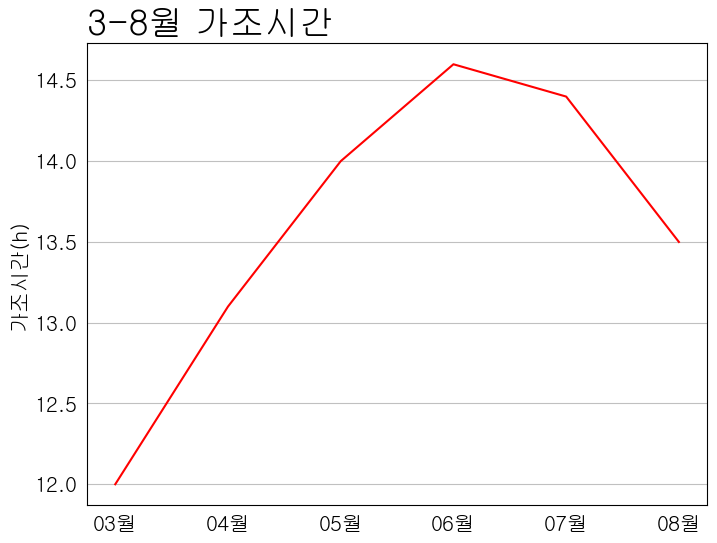

In [113]:
ax_pds = df['가조시간'].plot.line(rot=0,                     # Rotation for ticks
                      color="red",         # The color for each of the DataFrame’s columns.
                      figsize=(8, 6),            # Size of a figure object. (a tuple (width, height) in inches)
                      fontsize=15)  # 색상
ax_pds.set_title("3-8월 가조시간", loc="left",                         # Which title to set.
             color="black",                   # color
             fontsize=25)               # 제목
ax_pds.set_xlabel("")                                # x축 이름
ax_pds.set_ylabel("가조시간(h)", fontsize=15)                     # y축 이름
ax_pds.set_facecolor('white')                        # 배경색
ax_pds.grid(True, axis='y', color="silver")         # 눈금선(y축)
ax_pds.tick_params(left = False, bottom = False)   # 눈금 제거
ax_pds.spines['bottom'].set_color('black')           # x축 표시
ax_pds.legend().remove()  
plt.savefig('3-8월가조시간그래프.png')  
plt.show()

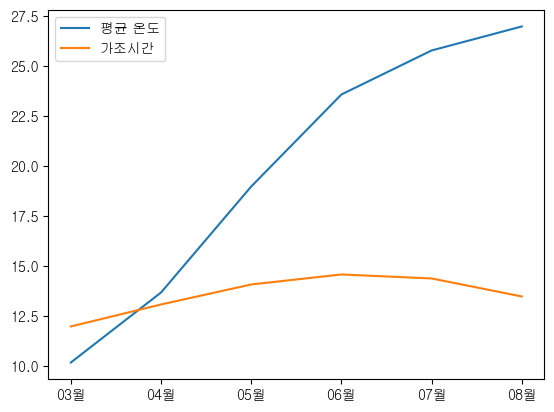

In [61]:
plt.plot(df.index, df['평균 온도'], df.index,df['가조시간'])
plt.legend(['평균 온도', '가조시간'])
plt.show()

In [65]:
x = round((30.1-2.3)/3,1)

In [69]:
mtlist = []
for i in range(0,3,1) :
    mtlist.append(round(2.3+x*i,1))
mtlist

[2.3, 11.6, 20.9]

In [118]:
mtemp_max = mergebus_df[mergebus_df['최고기온(°C)']>=mtlist[2]]
mtemp_middle = mergebus_df[(mergebus_df['최고기온(°C)']>=mtlist[1]) & (mergebus_df['최고기온(°C)']<mtlist[2])]
mtemp_min = mergebus_df[mergebus_df['최고기온(°C)']<mtlist[1]]

In [119]:
mtemp_min.head(10)

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),최고기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
5,2023년 03월 02일,동구,153134,135178,39531,163682,143308,41476,2.3,7.7,0.0,11.4,4.8
6,2023년 03월 02일,서구,223323,194062,54007,235898,204122,56134,2.3,7.7,0.0,11.4,4.8
7,2023년 03월 02일,중구,119158,107224,27178,128666,114012,28551,2.3,7.7,0.0,11.4,4.8
8,2023년 03월 02일,대덕구,78659,70530,16074,84400,74628,16747,2.3,7.7,0.0,11.4,4.8
9,2023년 03월 02일,유성구,143579,130362,31332,153291,138226,33010,2.3,7.7,0.0,11.4,4.8
45,2023년 03월 13일,동구,149412,130838,38722,159012,138209,40570,3.5,9.7,0.0,11.8,5.1
46,2023년 03월 13일,서구,219265,191203,53503,230383,199957,55484,3.5,9.7,0.0,11.8,5.1
47,2023년 03월 13일,중구,116884,104719,26232,125329,110517,27589,3.5,9.7,0.0,11.8,5.1
48,2023년 03월 13일,대덕구,77773,70341,16213,82780,74027,16870,3.5,9.7,0.0,11.8,5.1
49,2023년 03월 13일,유성구,140569,127371,31150,149344,134583,32761,3.5,9.7,0.0,11.8,5.1


In [125]:
person_max = int((mtemp_max['일반승차인원'].mean() + mtemp_max['청소년승차인원'].mean())/2)
person_middle = int((mtemp_middle['일반승차인원'].mean() + mtemp_middle['청소년승차인원'].mean())/2)
person_min = int((mtemp_min['일반승차인원'].mean() + mtemp_min['청소년승차인원'].mean())/2)

print(f"{mtlist[2]} ~ : {person_max}")
print(f"{mtlist[1]} ~ {mtlist[2]}: {person_middle}")
print(f"{mtlist[0]} ~ {mtlist[1]}: {person_min}")

20.9 ~ : 130882
11.6 ~ 20.9: 120882
2.3 ~ 11.6: 145405


In [71]:
x = round((35.7-7.7)/3,1)

htlist = []
for i in range(0,3,1) :
    htlist.append(round(7.7+x*i,1))
htlist

[7.7, 17.0, 26.3]

In [133]:
htemp_30 = mergebus_df[mergebus_df['최고기온(°C)']>=30]
htemp_20 = mergebus_df[(mergebus_df['최고기온(°C)']>=20) & (mergebus_df['최고기온(°C)']<30)]
htemp_10 = mergebus_df[mergebus_df['최고기온(°C)']<20]

In [134]:
htemp_10

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),최고기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,6.6,11.6,0.0,11.4,6.6
1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,6.6,11.6,0.0,11.4,6.6
2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,6.6,11.6,0.0,11.4,6.6
3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,6.6,11.6,0.0,11.4,6.6
4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,6.6,11.6,0.0,11.4,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,2023년 05월 07일,동구,103164,84655,19831,108373,88491,20685,12.0,15.7,0.2,13.9,14.3
321,2023년 05월 07일,서구,115218,100857,27451,123250,107106,28726,12.0,15.7,0.2,13.9,14.3
322,2023년 05월 07일,중구,70735,61805,13226,76497,65927,13975,12.0,15.7,0.2,13.9,14.3
323,2023년 05월 07일,대덕구,36080,31790,6135,38308,33381,6437,12.0,15.7,0.2,13.9,14.3


In [128]:
htemp_20

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),최고기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
30,2023년 03월 10일,동구,160646,142177,38857,170632,149969,40635,14.3,24.2,0.0,11.7,14.2
31,2023년 03월 10일,서구,232697,202481,54769,244968,212052,56870,14.3,24.2,0.0,11.7,14.2
32,2023년 03월 10일,중구,125080,114690,26972,134155,121179,28362,14.3,24.2,0.0,11.7,14.2
33,2023년 03월 10일,대덕구,81181,71616,16324,86391,75238,16913,14.3,24.2,0.0,11.7,14.2
34,2023년 03월 10일,유성구,148336,133632,31018,157801,141238,32579,14.3,24.2,0.0,11.7,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2023년 09월 01일,동구,169666,149915,41612,178793,156741,43283,23.1,29.4,0.0,13.0,26.5
860,2023년 09월 01일,서구,243619,212920,58467,255916,222269,60405,23.1,29.4,0.0,13.0,26.5
861,2023년 09월 01일,중구,129568,119526,28590,138660,125567,29897,23.1,29.4,0.0,13.0,26.5
862,2023년 09월 01일,대덕구,83066,73517,16319,88058,76803,16939,23.1,29.4,0.0,13.0,26.5


In [129]:
htemp_30

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),최고기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
365,2023년 05월 16일,동구,154608,136221,40812,162983,142601,42390,23.5,31.1,0.0,14.1,27.9
366,2023년 05월 16일,서구,232408,201818,56593,243155,210129,58423,23.5,31.1,0.0,14.1,27.9
367,2023년 05월 16일,중구,123396,111637,27450,131902,117408,28768,23.5,31.1,0.0,14.1,27.9
368,2023년 05월 16일,대덕구,80119,71737,16580,85037,75126,17183,23.5,31.1,0.0,14.1,27.9
369,2023년 05월 16일,유성구,150547,135949,32864,158851,142605,34255,23.5,31.1,0.0,14.1,27.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,2023년 09월 07일,동구,164744,146653,43207,173407,153069,44823,25.0,30.1,0.0,12.8,30.5
890,2023년 09월 07일,서구,243319,212731,59791,254763,221277,61578,25.0,30.1,0.0,12.8,30.5
891,2023년 09월 07일,중구,130540,118669,29524,139576,124670,30853,25.0,30.1,0.0,12.8,30.5
892,2023년 09월 07일,대덕구,83243,74603,17208,88149,77898,17796,25.0,30.1,0.0,12.8,30.5


In [135]:
person_30 = htemp_30['일반승차인원'].sum() + htemp_30['청소년승차인원'].sum()
person_20 = htemp_20['일반승차인원'].sum() + htemp_20['청소년승차인원'].sum()
person_10 = htemp_10['일반승차인원'].sum() + htemp_10['청소년승차인원'].sum()

print('30도 이상: ', person_30)
print('20도 이상: ', person_20)
print('10도 이상: ', person_10)

30도 이상:  75551709
20도 이상:  111190560
10도 이상:  44256688


In [137]:
person_30 = int((htemp_30['일반승차인원'].mean() + htemp_30['청소년승차인원'].mean())/2)
person_20 = int((htemp_20['일반승차인원'].mean() + htemp_20['청소년승차인원'].mean())/2)
person_10 = int((htemp_10['일반승차인원'].mean() + htemp_10['청소년승차인원'].mean())/2)

print('30도 이상: ', person_30)
print('20도 이상 30도 미만: ', person_20)
print('20도 미만: ', person_10)

30도 이상:  125085
20도 이상 30도 미만:  134940
20도 미만:  122935


In [17]:
n = 0
pre_month = mergebus_df.loc[0,'일자'].split(' ')[1]
month = mergebus_df.loc[0,'일자'].split(' ')[1]
date = mergebus_df.loc[0,'일자']
month_list = []
rainy_day = 0
rainy_list = []
result = []
for i in range(1,len(mergebus_df)):
    if mergebus_df.loc[i,'일자']==date:
        continue
    else :
        month = mergebus_df.loc[i,'일자'].split(' ')[1]
        date = mergebus_df.loc[i,'일자']
        if pre_month != month :
            result.append(f'{rainy_day}:{n}')
            rainy_list.append(rainy_day)
            month_list.append(pre_month)
            n=1
            pre_month = month
            if mergebus_df.loc[i,'일강수량(mm)'] >0.0:
                rainy_day = 1
            else : rainy_day = 0
        
        else:
            if mergebus_df.loc[i,'일강수량(mm)'] >0.0:
                rainy_day = rainy_day+1
            n=n+1
   
print(month_list)
print('비온날 : 전체 일수',rainy_list)
print('비온날 : 전체 일수', result)

['03월', '04월', '05월', '06월', '07월', '08월']
비온날 : 전체 일수 [2, 8, 8, 10, 22, 12]
비온날 : 전체 일수 ['2:30', '8:30', '8:31', '10:30', '22:31', '12:31']


In [18]:
data = {'월' : month_list, '비가 온 날' : rainy_list}
df = pd.DataFrame(data)
df = df.set_index('월')
df

,비가 온 날
월,
03월,2
04월,8
05월,8
06월,10
07월,22
08월,12


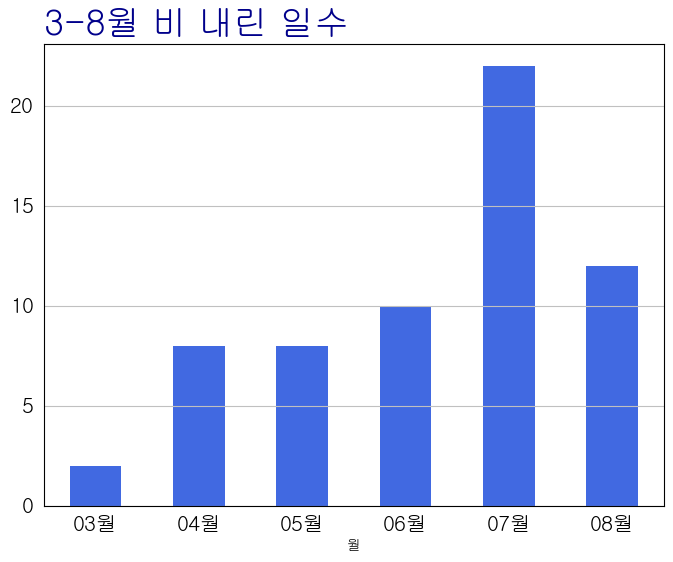

In [92]:
ax = df['비가 온 날'].plot.bar(rot=0,                     # Rotation for ticks
                      color="royalblue",         # The color for each of the DataFrame’s columns.
                      figsize=(8, 6),            # Size of a figure object. (a tuple (width, height) in inches)
                      fontsize=15)  # 색상
ax.set_title("3-8월 비 내린 일수", loc="left",                         # Which title to set.
             color="darkblue",                   # color
             fontsize=25)               # 제목                   # y축 이름
ax.set_facecolor('white')                        # 배경색
ax.grid(True, axis='y', color="silver")         # 눈금선(y축)
ax.tick_params(left = False, bottom = False)   # 눈금 제거
ax.spines['bottom'].set_color('black')           # x축 표시
ax.legend().remove()  
plt.savefig('3-8월비온날그래프.png')     

In [19]:
rain_data = mergebus_df.loc[:,['일자', '일반승차인원', '청소년승차인원','일강수량(mm)']]
rain_data

,일자,일반승차인원,청소년승차인원,일강수량(mm)
0,2023년 03월 01일,100600,105494,0.0
1,2023년 03월 01일,127262,135259,0.0
2,2023년 03월 01일,74800,79516,0.0
3,2023년 03월 01일,40925,43122,0.0
4,2023년 03월 01일,79446,84167,0.0
...,...,...,...,...
950,2023년 09월 07일,164744,173407,0.0
951,2023년 09월 07일,243319,254763,0.0
952,2023년 09월 07일,130540,139576,0.0
953,2023년 09월 07일,83243,88149,0.0


In [20]:
rainy_day_df = rain_data.loc[rain_data['일강수량(mm)']>0,:]
rainy_day_df = rainy_day_df.reset_index()
del rainy_day_df['index']
rainy_day_df

,일자,일반승차인원,청소년승차인원,일강수량(mm)
0,2023년 03월 12일,86844,91561,12.4
1,2023년 03월 12일,99989,107349,12.4
2,2023년 03월 12일,59028,63043,12.4
3,2023년 03월 12일,31464,33440,12.4
4,2023년 03월 12일,61134,65492,12.4
...,...,...,...,...
305,2023년 08월 30일,143178,150846,44.4
306,2023년 08월 30일,220690,231638,44.4
307,2023년 08월 30일,118811,127022,44.4
308,2023년 08월 30일,73527,78024,44.4


In [121]:
rainy_day_df['일자'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 310 entries, 0 to 309
Series name: 일자
Non-Null Count  Dtype 
--------------  ----- 
310 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB


In [21]:
non_rainy_day_df = rain_data.loc[rain_data['일강수량(mm)']==0,:]
non_rainy_day_df = non_rainy_day_df.reset_index()
del non_rainy_day_df['index']
non_rainy_day_df

,일자,일반승차인원,청소년승차인원,일강수량(mm)
0,2023년 03월 01일,100600,105494,0.0
1,2023년 03월 01일,127262,135259,0.0
2,2023년 03월 01일,74800,79516,0.0
3,2023년 03월 01일,40925,43122,0.0
4,2023년 03월 01일,79446,84167,0.0
...,...,...,...,...
640,2023년 09월 07일,164744,173407,0.0
641,2023년 09월 07일,243319,254763,0.0
642,2023년 09월 07일,130540,139576,0.0
643,2023년 09월 07일,83243,88149,0.0


In [62]:
rainy_person = int((rainy_day_df['일반승차인원'].mean() + rainy_day_df['청소년승차인원'].mean()))
non_rainy_person = int((non_rainy_day_df['일반승차인원'].mean() + non_rainy_day_df['청소년승차인원'].mean()))

print('비 내린 날 평균 이용객 :',rainy_person)
print('비 안온 날 평균 이용객 :',non_rainy_person)


비 내린 날 평균 이용객 : 242401
비 안온 날 평균 이용객 : 241635


In [23]:

rainy_day6_7 = rainy_day_df[rainy_day_df['일자'].str.contains('06월') | rainy_day_df['일자'].str.contains('07월')]
rainy_day6_7

,일자,일반승차인원,청소년승차인원,일강수량(mm)
90,2023년 06월 08일,151330,159508,0.3
91,2023년 06월 08일,224998,235377,0.3
92,2023년 06월 08일,119876,128011,0.3
93,2023년 06월 08일,81064,85803,0.3
94,2023년 06월 08일,143786,151824,0.3
...,...,...,...,...
245,2023년 07월 30일,87106,90663,31.6
246,2023년 07월 30일,107625,114148,31.6
247,2023년 07월 30일,63078,66569,31.6
248,2023년 07월 30일,32902,34859,31.6


In [24]:
non_rainy_day6_7 = non_rainy_day_df[non_rainy_day_df['일자'].str.contains('06월') | non_rainy_day_df['일자'].str.contains('07월')]
non_rainy_day6_7

,일자,일반승차인원,청소년승차인원,일강수량(mm)
370,2023년 06월 01일,156183,165153,0.0
371,2023년 06월 01일,229452,241357,0.0
372,2023년 06월 01일,123305,132853,0.0
373,2023년 06월 01일,79920,84621,0.0
374,2023년 06월 01일,146847,155046,0.0
...,...,...,...,...
510,2023년 07월 31일,136480,141742,0.0
511,2023년 07월 31일,206517,215521,0.0
512,2023년 07월 31일,113729,119260,0.0
513,2023년 07월 31일,68205,70924,0.0


In [25]:
rainy_person6_7 = (rainy_day6_7['일반승차인원'].sum() + rainy_day6_7['청소년승차인원'].sum())
non_rainy_person6_7 = (non_rainy_day6_7['일반승차인원'].sum() + non_rainy_day6_7['청소년승차인원'].sum())

print('6,7월 비 내린 날 전체 이용객 :',rainy_person6_7)
print('6,7월비 안온 날 전체 이용객 :',non_rainy_person6_7)

6,7월 비 내린 날 전체 이용객 : 41138344
6,7월비 안온 날 전체 이용객 : 35617126


In [45]:
rainy_person6_7 = int((rainy_day6_7['일반승차인원'].mean() + rainy_day6_7['청소년승차인원'].mean()))
non_rainy_person6_7 = int((non_rainy_day6_7['일반승차인원'].mean() + non_rainy_day6_7['청소년승차인원'].mean()))

print('6,7월 비 내린 날 일 평균 이용객 :',rainy_person6_7)
print('6,7월비 안온 날 일 평균 이용객 :',non_rainy_person6_7)

6,7월 비 내린 날 일 평균 이용객 : 257114
6,7월비 안온 날 일 평균 이용객 : 245635


In [10]:
import pandas as pd

In [11]:
data = pd.read_csv(r'빅데이터 자료\최종데이터.csv')
data

,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,6.6,0.0,11.4,6.6
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,6.6,0.0,11.4,6.6
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,6.6,0.0,11.4,6.6
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,6.6,0.0,11.4,6.6
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,6.6,0.0,11.4,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,2023년 09월 07일,동구,164744,146653,43207,173407,153069,44823,25.0,0.0,12.8,30.5
951,951,2023년 09월 07일,서구,243319,212731,59791,254763,221277,61578,25.0,0.0,12.8,30.5
952,952,2023년 09월 07일,중구,130540,118669,29524,139576,124670,30853,25.0,0.0,12.8,30.5
953,953,2023년 09월 07일,대덕구,83243,74603,17208,88149,77898,17796,25.0,0.0,12.8,30.5


In [12]:
del data['Unnamed: 0']
data

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,6.6,0.0,11.4,6.6
1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,6.6,0.0,11.4,6.6
2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,6.6,0.0,11.4,6.6
3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,6.6,0.0,11.4,6.6
4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,6.6,0.0,11.4,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...
950,2023년 09월 07일,동구,164744,146653,43207,173407,153069,44823,25.0,0.0,12.8,30.5
951,2023년 09월 07일,서구,243319,212731,59791,254763,221277,61578,25.0,0.0,12.8,30.5
952,2023년 09월 07일,중구,130540,118669,29524,139576,124670,30853,25.0,0.0,12.8,30.5
953,2023년 09월 07일,대덕구,83243,74603,17208,88149,77898,17796,25.0,0.0,12.8,30.5


In [13]:
dongu = data.loc[data['구']=='동구', :]
seogu = data.loc[data['구']=='서구', :]
joonggu = data.loc[data['구']=='중구', :]
daedukgu = data.loc[data['구']=='대덕구', :]
youseonggu = data.loc[data['구']=='유성구', :]

In [14]:
dongu

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,6.6,0.0,11.4,6.6
5,2023년 03월 02일,동구,153134,135178,39531,163682,143308,41476,2.3,0.0,11.4,4.8
10,2023년 03월 03일,동구,157846,138918,38445,168149,146944,40310,4.2,0.0,11.5,5.8
15,2023년 03월 04일,동구,120663,106600,26033,125448,110436,26851,6.4,0.0,11.5,7.2
20,2023년 03월 05일,동구,98799,82763,19361,103495,86339,20139,7.9,0.0,11.5,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...
930,2023년 09월 03일,동구,104456,87683,20548,108961,91083,21325,27.0,0.0,12.9,30.7
935,2023년 09월 04일,동구,163235,143941,42178,171653,150193,43657,27.4,0.0,12.9,29.8
940,2023년 09월 05일,동구,165117,145755,43302,173617,152012,44875,26.9,0.0,12.8,30.7
945,2023년 09월 06일,동구,163052,144212,42734,171862,150714,44362,26.0,0.0,12.8,29.2


In [15]:
seogu

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,6.6,0.0,11.4,6.6
6,2023년 03월 02일,서구,223323,194062,54007,235898,204122,56134,2.3,0.0,11.4,4.8
11,2023년 03월 03일,서구,231381,201442,54754,243869,211047,56866,4.2,0.0,11.5,5.8
16,2023년 03월 04일,서구,160162,138543,35082,168949,145364,36494,6.4,0.0,11.5,7.2
21,2023년 03월 05일,서구,113648,98808,26232,121353,104729,27451,7.9,0.0,11.5,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...
931,2023년 09월 03일,서구,124155,108415,29555,132180,114418,30809,27.0,0.0,12.9,30.7
936,2023년 09월 04일,서구,239764,209493,58709,250930,217929,60499,27.4,0.0,12.9,29.8
941,2023년 09월 05일,서구,240824,210473,58565,252256,219174,60312,26.9,0.0,12.8,30.7
946,2023년 09월 06일,서구,244750,212740,59999,257036,221889,61904,26.0,0.0,12.8,29.2


In [16]:
joonggu

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,6.6,0.0,11.4,6.6
7,2023년 03월 02일,중구,119158,107224,27178,128666,114012,28551,2.3,0.0,11.4,4.8
12,2023년 03월 03일,중구,122528,112230,26570,131596,118583,27981,4.2,0.0,11.5,5.8
17,2023년 03월 04일,중구,91074,84040,17280,96171,87966,17947,6.4,0.0,11.5,7.2
22,2023년 03월 05일,중구,67465,60562,12480,71532,63461,12972,7.9,0.0,11.5,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...
932,2023년 09월 03일,중구,70509,63292,13704,74968,66548,14249,27.0,0.0,12.9,30.7
937,2023년 09월 04일,중구,127161,114738,29012,135674,120285,30201,27.4,0.0,12.9,29.8
942,2023년 09월 05일,중구,130556,118618,29494,139612,124547,30856,26.9,0.0,12.8,30.7
947,2023년 09월 06일,중구,128611,116687,29120,138224,123152,30556,26.0,0.0,12.8,29.2


In [17]:
daedukgu

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,6.6,0.0,11.4,6.6
8,2023년 03월 02일,대덕구,78659,70530,16074,84400,74628,16747,2.3,0.0,11.4,4.8
13,2023년 03월 03일,대덕구,81545,72681,16390,86789,76386,17030,4.2,0.0,11.5,5.8
18,2023년 03월 04일,대덕구,52533,45811,9484,55079,47582,9841,6.4,0.0,11.5,7.2
23,2023년 03월 05일,대덕구,36059,32005,6372,38127,33494,6691,7.9,0.0,11.5,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...
933,2023년 09월 03일,대덕구,39925,35616,6956,42124,37161,7288,27.0,0.0,12.9,30.7
938,2023년 09월 04일,대덕구,80582,72933,16482,85453,76216,17067,27.4,0.0,12.9,29.8
943,2023년 09월 05일,대덕구,83189,74818,17162,88214,78137,17784,26.9,0.0,12.8,30.7
948,2023년 09월 06일,대덕구,82650,74433,17056,87545,77749,17649,26.0,0.0,12.8,29.2


In [18]:
youseonggu

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,6.6,0.0,11.4,6.6
9,2023년 03월 02일,유성구,143579,130362,31332,153291,138226,33010,2.3,0.0,11.4,4.8
14,2023년 03월 03일,유성구,145379,131499,30437,154660,139076,32013,4.2,0.0,11.5,5.8
19,2023년 03월 04일,유성구,97942,89544,19185,103137,93856,20039,6.4,0.0,11.5,7.2
24,2023년 03월 05일,유성구,70364,66962,14605,74863,70910,15444,7.9,0.0,11.5,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...
934,2023년 09월 03일,유성구,75578,71796,15819,80238,75687,16614,27.0,0.0,12.9,30.7
939,2023년 09월 04일,유성구,152578,140131,34011,160704,146560,35299,27.4,0.0,12.9,29.8
944,2023년 09월 05일,유성구,152210,138475,33163,160087,144663,34375,26.9,0.0,12.8,30.7
949,2023년 09월 06일,유성구,152795,139392,33027,161237,146177,34353,26.0,0.0,12.8,29.2


In [19]:
dongu_geton = dongu['일반승차인원'].sum()+dongu['청소년승차인원'].sum()
seogu_geton = seogu['일반승차인원'].sum()+seogu['청소년승차인원'].sum()
joonggu_geton = joonggu['일반승차인원'].sum()+joonggu['청소년승차인원'].sum()
daedukgu_geton = daedukgu['일반승차인원'].sum()+daedukgu['청소년승차인원'].sum()
youseonggu_geton = youseonggu['일반승차인원'].sum()+youseonggu['청소년승차인원'].sum()

In [20]:
dongu_geton

50038359

In [21]:
geton_data = {
    '구': ['동구', '서구', '중구', '대덕구', '유성구'],
    '승차인원': [dongu_geton,seogu_geton,joonggu_geton,daedukgu_geton,youseonggu_geton]
}
geton_df = pd.DataFrame(geton_data)
geton_df

,구,승차인원
0,동구,50038359
1,서구,71994533
2,중구,39528329
3,대덕구,24475665
4,유성구,44962071


In [20]:
import folium

In [2]:
import geopandas as gpd

In [56]:
sig.loc[sig['SIG_KOR_NM']=='동구',:]

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
106,29110,Dong-gu,동구,"POLYGON ((948104.477 1685247.294, 948105.130 1..."
112,27140,Dong-gu,동구,"POLYGON ((1107777.593 1780522.269, 1107845.409..."
119,30110,Dong-gu,동구,"POLYGON ((999321.491 1826867.967, 999239.953 1..."
126,26170,Dong-gu,동구,"POLYGON ((1140524.122 1684496.506, 1140581.141..."
168,31170,Dong-gu,동구,"MULTIPOLYGON (((1176437.578 1723448.218, 11764..."
172,28140,Dong-gu,동구,"POLYGON ((923654.098 1944419.625, 923693.954 1..."


In [3]:
### 대전광역시 추출
### Shape file - 시군구
shp_file = r"C:\Users\user\Documents\Jupyter Notebook\data\Park_P\SIG_202101\TL_SCCO_SIG.shp"
sig = gpd.read_file(shp_file, encoding='cp949')

cnd = sig['SIG_CD'].str.slice(0,2) == '30'
sig_30 = sig[cnd]
sig_30

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
119,30110,Dong-gu,동구,"POLYGON ((999321.491 1826867.967, 999239.953 1..."
120,30140,Jung-gu,중구,"POLYGON ((995945.175 1811588.887, 995945.178 1..."
121,30170,Seo-gu,서구,"POLYGON ((988338.682 1810216.004, 988338.685 1..."
122,30200,Yuseong-gu,유성구,"POLYGON ((986874.610 1814985.122, 986851.599 1..."
123,30230,Daedeok-gu,대덕구,"POLYGON ((998333.118 1831051.084, 998569.440 1..."


In [4]:
sig

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,42110,Chuncheon-si,춘천시,"POLYGON ((1007462.095 2008948.792, 1007512.150..."
1,42130,Wonju-si,원주시,"POLYGON ((1038519.196 1944888.174, 1038552.691..."
2,42150,Gangneung-si,강릉시,"MULTIPOLYGON (((1136545.803 1962251.161, 11365..."
3,42170,Donghae-si,동해시,"MULTIPOLYGON (((1140184.975 1956251.627, 11401..."
4,42190,Taebaek-si,태백시,"POLYGON ((1133987.168 1927444.971, 1133980.895..."
...,...,...,...,...
245,43745,Jeungpyeong-gun,증평군,"POLYGON ((1003329.529 1867824.774, 1003386.941..."
246,43750,Jincheon-gun,진천군,"POLYGON ((994785.370 1890378.710, 994834.270 1..."
247,43760,Goesan-gun,괴산군,"POLYGON ((1026770.639 1883281.549, 1026781.261..."
248,43770,Eumseong-gun,음성군,"POLYGON ((1011533.109 1906176.344, 1011531.998..."


In [5]:
import folium

In [22]:
sig_30_tb = sig_30.merge(geton_df, left_on='SIG_KOR_NM', right_on='구')
sig_30_tb

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,구,승차인원
0,30110,Dong-gu,동구,"POLYGON ((999321.491 1826867.967, 999239.953 1...",동구,50038359
1,30140,Jung-gu,중구,"POLYGON ((995945.175 1811588.887, 995945.178 1...",중구,39528329
2,30170,Seo-gu,서구,"POLYGON ((988338.682 1810216.004, 988338.685 1...",서구,71994533
3,30200,Yuseong-gu,유성구,"POLYGON ((986874.610 1814985.122, 986851.599 1...",유성구,44962071
4,30230,Daedeok-gu,대덕구,"POLYGON ((998333.118 1831051.084, 998569.440 1...",대덕구,24475665


In [30]:
### base map
m = folium.Map(location=[36.36, 127.39], zoom_start=10.5, 
               tiles="cartodbpositron")
### add layer
folium.Choropleth(
    geo_data=sig_30_tb,
    name='구별 승차인원',
    data=sig_30_tb,
    columns=["SIG_KOR_NM", "승차인원"],
    key_on='feature.properties.SIG_KOR_NM',
    fill_color="YlGnBu"
).add_to(m)
### add layer contral
folium.LayerControl().add_to(m)
m

In [39]:
from folium import plugins

In [41]:
m.save('대전승차인원지도.html')  # 먼저 HTML 파일로 저장

In [44]:
dongu_getoff = dongu['일반하차인원'].sum()+dongu['청소년하차인원'].sum()
seogu_getoff = seogu['일반하차인원'].sum()+seogu['청소년하차인원'].sum()
joonggu_getoff = joonggu['일반하차인원'].sum()+joonggu['청소년하차인원'].sum()
daedukgu_getoff = daedukgu['일반하차인원'].sum()+daedukgu['청소년하차인원'].sum()
youseonggu_getoff = youseonggu['일반하차인원'].sum()+youseonggu['청소년하차인원'].sum()

In [45]:
getoff_data = {
    '구': ['동구', '서구', '중구', '대덕구', '유성구'],
    '하차인원': [dongu_getoff,seogu_getoff,joonggu_getoff,daedukgu_getoff,youseonggu_getoff]
}
getoff_df = pd.DataFrame(getoff_data)
getoff_df

,구,하차인원
0,동구,43854975
1,서구,62268786
2,중구,35489775
3,대덕구,21592683
4,유성구,40674520


In [34]:
dongu_change = dongu['일반환승인원'].sum()+dongu['청소년환승인원'].sum()
seogu_change = seogu['일반환승인원'].sum()+seogu['청소년환승인원'].sum()
joonggu_change = joonggu['일반환승인원'].sum()+joonggu['청소년환승인원'].sum()
daedukgu_change = daedukgu['일반환승인원'].sum()+daedukgu['청소년환승인원'].sum()
youseonggu_change = youseonggu['일반환승인원'].sum()+youseonggu['청소년환승인원'].sum()

getchange_data = {
    '구': ['동구', '서구', '중구', '대덕구', '유성구'],
    '환승인원': [dongu_change,seogu_change,joonggu_change,daedukgu_change,youseonggu_change]
}
getchange_df = pd.DataFrame(getchange_data)
getchange_df

,구,환승인원
0,동구,12175860
1,서구,16968069
2,중구,8338517
3,대덕구,4859454
4,유성구,9440483


In [35]:
sig_30_tb = sig_30.merge(getchange_df, left_on='SIG_KOR_NM', right_on='구')
sig_30_tb

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,구,환승인원
0,30110,Dong-gu,동구,"POLYGON ((999321.491 1826867.967, 999239.953 1...",동구,12175860
1,30140,Jung-gu,중구,"POLYGON ((995945.175 1811588.887, 995945.178 1...",중구,8338517
2,30170,Seo-gu,서구,"POLYGON ((988338.682 1810216.004, 988338.685 1...",서구,16968069
3,30200,Yuseong-gu,유성구,"POLYGON ((986874.610 1814985.122, 986851.599 1...",유성구,9440483
4,30230,Daedeok-gu,대덕구,"POLYGON ((998333.118 1831051.084, 998569.440 1...",대덕구,4859454


In [42]:
### base map
m = folium.Map(location=[36.36, 127.39], zoom_start=10.5, 
               tiles="cartodbpositron")
### add layer
folium.Choropleth(
    geo_data=sig_30_tb,
    name='구별 환승인원',
    data=sig_30_tb,
    columns=["SIG_KOR_NM", "환승인원"],
    key_on='feature.properties.SIG_KOR_NM',
    fill_color="YlGnBu"
).add_to(m)
### add layer contral
folium.LayerControl().add_to(m)
m

In [47]:
m.save('대전환승인원지도.html')  # 먼저 HTML 파일로 저장

In [46]:
sig_30_tb = sig_30.merge(getoff_df, left_on='SIG_KOR_NM', right_on='구')
sig_30_tb

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,구,하차인원
0,30110,Dong-gu,동구,"POLYGON ((999321.491 1826867.967, 999239.953 1...",동구,43854975
1,30140,Jung-gu,중구,"POLYGON ((995945.175 1811588.887, 995945.178 1...",중구,35489775
2,30170,Seo-gu,서구,"POLYGON ((988338.682 1810216.004, 988338.685 1...",서구,62268786
3,30200,Yuseong-gu,유성구,"POLYGON ((986874.610 1814985.122, 986851.599 1...",유성구,40674520
4,30230,Daedeok-gu,대덕구,"POLYGON ((998333.118 1831051.084, 998569.440 1...",대덕구,21592683


In [48]:
### base map
m = folium.Map(location=[36.36, 127.39], zoom_start=10.5, 
               tiles="cartodbpositron")
### add layer
folium.Choropleth(
    geo_data=sig_30_tb,
    name='구별 하차인원',
    data=sig_30_tb,
    columns=["SIG_KOR_NM", "하차인원"],
    key_on='feature.properties.SIG_KOR_NM',
    fill_color="YlGnBu"
).add_to(m)
### add layer contral
folium.LayerControl().add_to(m)
m

In [49]:
m.save('대전하차인원지도.html')  # 먼저 HTML 파일로 저장

In [51]:
gu_data = {
    '구': ['동구', '서구', '중구', '대덕구', '유성구'],
    '승차인원': [dongu_geton,seogu_geton,joonggu_geton,daedukgu_geton,youseonggu_geton],
    '하차인원': [dongu_getoff,seogu_getoff,joonggu_getoff,daedukgu_getoff,youseonggu_getoff],
    '환승인원': [dongu_change,seogu_change,joonggu_change,daedukgu_change,youseonggu_change]
}
gu_df = pd.DataFrame(gu_data)
gu_df

,구,승차인원,하차인원,환승인원
0,동구,50038359,43854975,12175860
1,서구,71994533,62268786,16968069
2,중구,39528329,35489775,8338517
3,대덕구,24475665,21592683,4859454
4,유성구,44962071,40674520,9440483


## 필요한 라이브러리 호출

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
Y = mergebus_df[["일반승차인원"]]
X = mergebus_df[["평균기온(°C)", "일강수량(mm)", "가조시간(hr)", "평균 지면온도(°C)"]]

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [88]:
lr = LinearRegression()

In [89]:
lr.fit(X_train, Y_train)

LinearRegression()

In [90]:
Y_predict = lr.predict(X_test)

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/sojaeyeong/빅데이터 자료 모음/.venv/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/Users/sojaeyeong/빅데이터 자료 모음/.venv/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/Users/sojaeyeong/빅데이터 자료 모음/.venv/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/Users/sojaeyeong/빅데이터 자료 모음/.venv/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  func(*args, **kwargs)
/Users/sojaeyeong/빅데이터 자료 모음/.venv/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args,

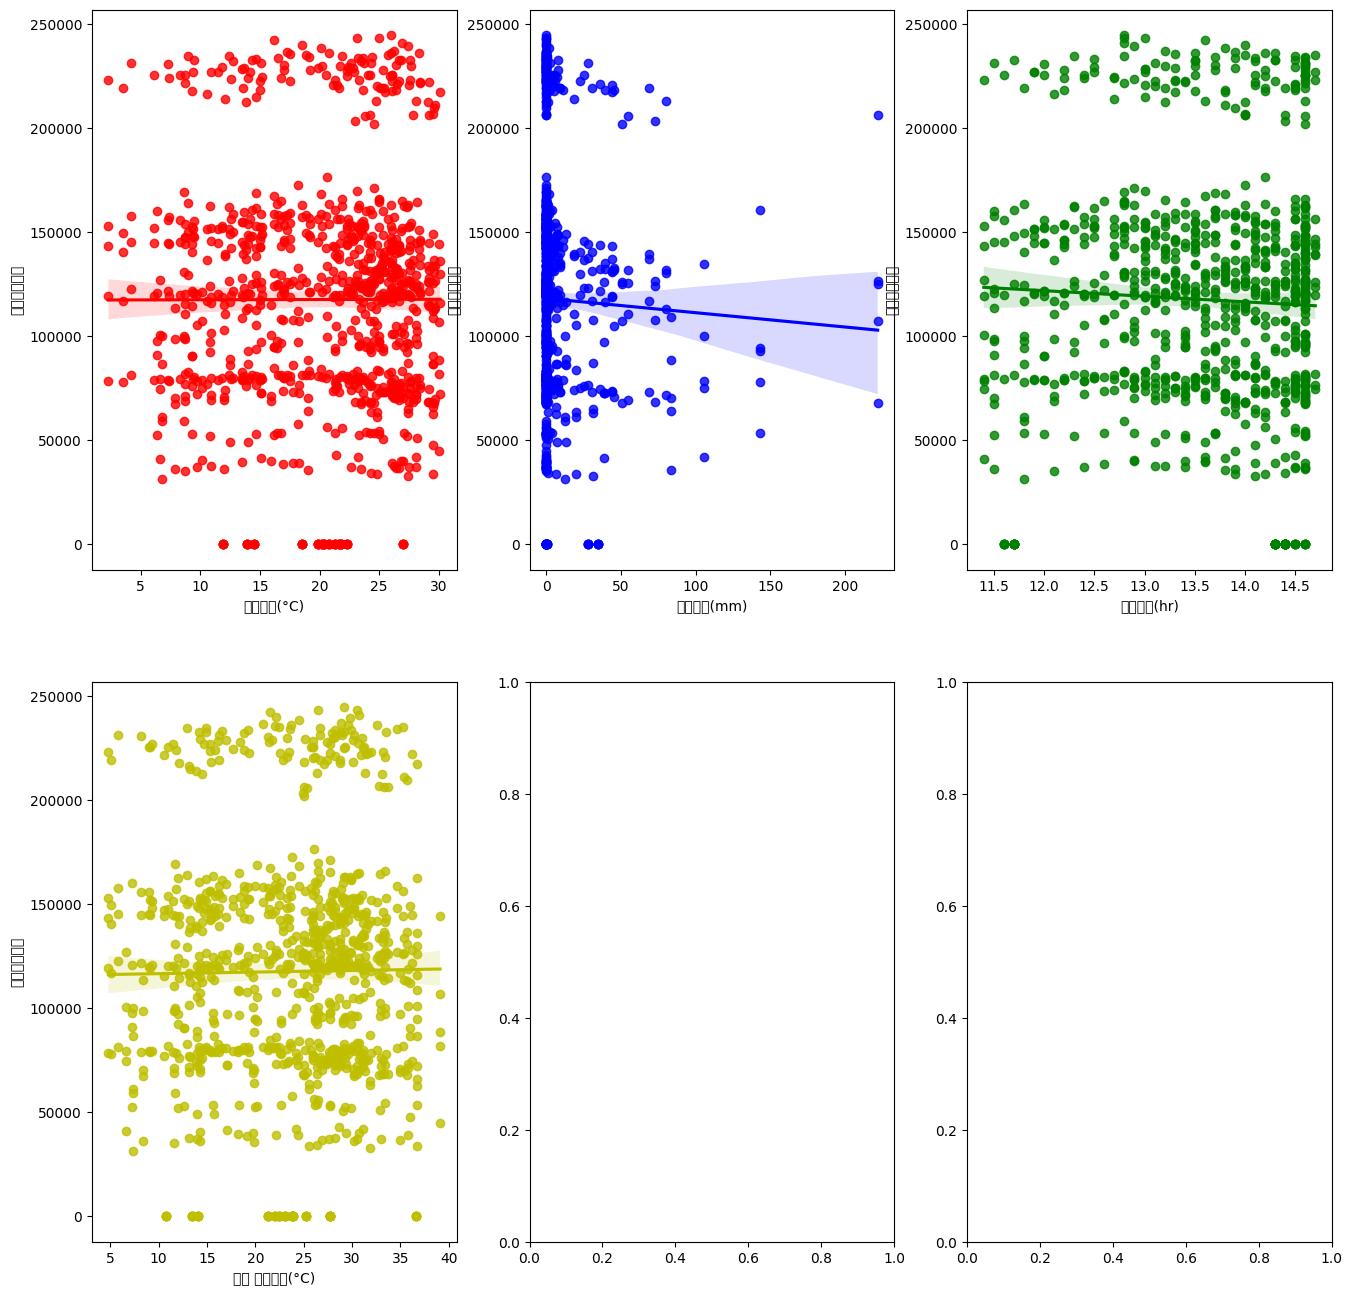

In [92]:
fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 2)
x_features = ["평균기온(°C)", "일강수량(mm)", "가조시간(hr)", "평균 지면온도(°C)"]
plot_color = ["r", "b", "g", "y"]
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = "일반승차인원", data = mergebus_df, ax = axs[row][col], color = plot_color[i])